# Domácí úkol č. 1 - 🕵️‍♀️ Explorační analýza dat

## 📚 Data
V souborech `intakes.csv` a `outcomes.csv` naleznete data z útulku ve městě Austin, Texas USA. Data pocházejí z oficiálního [zdroje otevřených dat města Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) obsahuje data o přijatých zvířatech od 1. 10. 2013 do 27. 4 2022. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) obsahuje údaje o zvířatech, která útulek opustila (např. byla adoptována, vrácena majiteli a podobně) za tentýž časový interval. Může se stát, že zvířata přijatá do 1. 10. 2013 se nevyskytují v `intakes.csv` (data se ještě neshromažďovala), ale budou mít záznam v `outcomes.csv`, pokud útulek po tomto datu opustila.

☝️ Každý dataset může **stejné zvíře obsahovat víckrát** (1. některá zvířata se do útulku vracela - to je trochu komplikace, pokud byste datasety chtěli spojit - pro řešení úkolu spojování ale není nutné, 2. některé záznamy jsou duplicitní - ty můžete odstranit, jedná se o chybu). 

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 3 body.

**✨ Příprava dat** (celkem 4 body)
* Importujte potřebné balíčky.
* Načtěte si datasety intakes a outcomes z příslušných csv souborů.
* Seznamte se s oběma datasety a svá zjištění komentujte:
  * Příklad informací, které lze zjistit: počet řádků datasetu, počet a význam příznaků, datový typ příznaků a počet jejich unikátních hodnot, ...
* Vyčistěte a zkonvertujte data:
  * Zjistěte jakým způsobem jsou v datasetu uváděny chybějící hodnoty a v případě potřeby je přepište na NaN.
  * Zkonvertujte kategorické příznaky na typ category.
  * Převeďte příznak Age upon Intake/Outcome na numerický příznak.
  * Převeďte příznak DateTime na typ datetime64.
  * Proveďte všechny další úpravy, které vám dávají smysl (konverze dalších příznaků, odstranění duplicitních údajů, přidání nových příznaků, ...).
  
**🖊️ Deskriptivní statistiky** (celkem 6 bodů)

Volbu vhodných statistik pro daný typ dat komentujte a pokud je to možné, využívejte co nejvíce vizualizace.
* Popište příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberte si dva příznaky, mezi kterými by mohl být nějaký vztah (např. korelace) a popište tento vztah pomocí bivariačních deskriptivních statistik. Dvojice typu Age upon Intake a Age upon Outcome neuznáváme.

**❓ Zadané otázky** (2 body za každou otázku, celkem max. 6 bodů)

Pomocí vhodných vizualizací odpovídejte na následující otázky:
* Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.
* Hraje věk zvířete roli při adopci?
* Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

K jedné otázce můžete v případě potřeby vytvořit více vizualizací. Výsledek vizualizace a všechny mezikroky komentujte.

**❓ Vlastní otázky** (2 body za každou otázku, celkem max. 6 bodů)

Vymyslete **minimálně tři** vlastní otázky a odpovídejte na ně vhodnými vizualizacemi. Otázky můžete postavit na již zmíněných datasetech. Také je možné využít třetí dataset [locations](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Found-Pets-Map/hye6-gvq2), který naleznete v souboru locations.csv, nebo si můžete stáhnout nějaká další zajímavá data, která souvisí s tímto tématem.

Dataset locations poskytuje informace o všech toulavých kočkách a psech, které jsou v databázi útulku **méně než týden**. Většina se nachází v útulku, ale část z nich je u dobrovolníků – tato informace je uvedena ve sloupci At AAC (AAC – Austin Animal Center).

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 3 body za komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za přípravu dat,
- 6 bodů za deskriptivní statistiku,
- 6 bodů za zodpovězení všech zadaných otázek,
- 6 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 1 získat maximálně 25 bodů.

___

# **📊Řešení📈**

## *✨ Příprava dat*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

> ##### Načtěme dataset

In [2]:
intakes = pd.read_csv("intakes.csv")
outcomes = pd.read_csv("outcomes.csv")

> ##### Podiváme se jak vypadají dataframy

In [3]:
display(intakes.head())
outcomes.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


> ##### Podívejme se na velikost datasetu a typ hodnot
> * A uvidíme, že všechny přiznaky májí type object

In [4]:
print(f"Dataframe 'intakes' má {intakes.shape[0]} řádků a {intakes.shape[1]} sloupců")
print(f"Dataframe 'outcomes' má {outcomes.shape[0]} řádků a {outcomes.shape[1]} sloupců")
display(intakes.dtypes.value_counts())
outcomes.dtypes.value_counts()

Dataframe 'intakes' má 138585 řádků a 12 sloupců
Dataframe 'outcomes' má 138769 řádků a 12 sloupců


object    12
Name: count, dtype: int64

object    12
Name: count, dtype: int64

> ##### Podívejme se na informace o dataframech
>> * Vidíme, že přiznak ***Name*** v obou dataframech a přiznak ***Outcome Subtype*** v **outcomes** mají hodně null hodnot

In [5]:
display(intakes.info())
print("_____________________________________________________________\n")
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


None

_____________________________________________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              97514 non-null   object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138746 non-null  object
 6   Outcome Subtype   63435 non-null   object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138768 non-null  object
 9   Age upon Outcome  138764 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


> ##### Zkontrolujeme všechny přiznaky na prázdné hodnoty

In [6]:
words = ["Unknown", "N/A", "None", "-", "?", ""] # co tam asi muze byt
word_stats_intakes = {}
word_stats_outcomes = {}

print("Intakes")
for col in intakes.columns:
    count = 0
    for word in words:
        count += (intakes[col] == word).sum()
    word_stats_intakes[col] = count

for col, count in word_stats_intakes.items():
    print(f"Přiznak {col}: {count} prázdných hodnot")
    
print("_____________________________________________________________\n")

print("Outcomes")
for col in outcomes.columns:
    count = 0
    for word in words:
        count += (outcomes[col] == word).sum()
    word_stats_outcomes[col] = count

for col, count in word_stats_outcomes.items():
    print(f"Přiznak {col}: {count} prázdných hodnot")

Intakes
Přiznak Animal ID: 0 prázdných hodnot
Přiznak Name: 19 prázdných hodnot
Přiznak DateTime: 0 prázdných hodnot
Přiznak MonthYear: 0 prázdných hodnot
Přiznak Found Location: 0 prázdných hodnot
Přiznak Intake Type: 0 prázdných hodnot
Přiznak Intake Condition: 0 prázdných hodnot
Přiznak Animal Type: 0 prázdných hodnot
Přiznak Sex upon Intake: 11069 prázdných hodnot
Přiznak Age upon Intake: 0 prázdných hodnot
Přiznak Breed: 3 prázdných hodnot
Přiznak Color: 0 prázdných hodnot
_____________________________________________________________

Outcomes
Přiznak Animal ID: 0 prázdných hodnot
Přiznak Name: 19 prázdných hodnot
Přiznak DateTime: 0 prázdných hodnot
Přiznak MonthYear: 0 prázdných hodnot
Přiznak Date of Birth: 0 prázdných hodnot
Přiznak Outcome Type: 0 prázdných hodnot
Přiznak Outcome Subtype: 0 prázdných hodnot
Přiznak Animal Type: 0 prázdných hodnot
Přiznak Sex upon Outcome: 11052 prázdných hodnot
Přiznak Age upon Outcome: 0 prázdných hodnot
Přiznak Breed: 3 prázdných hodnot
Při

> ##### Vyměním prázdné hodnoty za NaN

In [7]:
intakes = intakes.replace(["Unknown", "N/A", "None", "-", "?", ""], np.nan)
outcomes = outcomes.replace(["Unknown", "N/A", "None", "-", "?", ""], np.nan)

> ##### Odstraním dublicitní zaznamy

In [8]:
intakes = intakes.drop_duplicates()
outcomes = outcomes.drop_duplicates()

> ##### Zkonvertuju kategorické příznaky na typ category

In [9]:
to_category_intakes = ["Intake Type", "Intake Condition", "Animal Type", "Sex upon Intake", "Breed", "Color"]
to_category_outcomes = ["Outcome Type", "Outcome Subtype", "Animal Type", "Sex upon Outcome" , "Breed", "Color"]

for col in to_category_intakes:
    intakes[col] = intakes[col].astype("category")
for col in to_category_outcomes:
    outcomes[col] = outcomes[col].astype("category")

> ##### Během prohledavaní dataframu jsem všiml, že nekterá jmena obshují symbol *, ten symbol smažu

In [10]:
intakes["Name"] = intakes["Name"].str.replace("*", "")
outcomes["Name"] = outcomes["Name"].str.replace("*", "")

> ##### Převedu přiznaky ***Age upon Intake*** a ***Age upon Outcome*** na počítání v rocích (ve floatu)

In [11]:
def age_to_years(age): 

    if pd.isna(age): return None
    
    age_split = age.split() 
    num = int(age_split[0]) 
    unit = age_split[1] 
    
    if unit == "year" or unit == "years": return num 
    elif unit == "month" or unit == "months": return num / 12 
    elif unit == "week" or unit == "weeks": return num / 52 
    elif unit == "day" or unit == "days": return num / 365 
    else: return None

In [12]:
intakes["Age upon Intake"] = intakes["Age upon Intake"].apply(age_to_years)
outcomes["Age upon Outcome"] = outcomes["Age upon Outcome"].apply(age_to_years)

> ##### Také jsem si všiml, že přiznaky ***Age upon Intake*** a ***Age upon Outcome*** obsahují zaporné hodnoty, které nahradím NaN

In [13]:
intakes["Age upon Intake"] = intakes["Age upon Intake"].where(intakes["Age upon Intake"] >= 0, np.nan)
outcomes["Age upon Outcome"] = outcomes["Age upon Outcome"].where(outcomes["Age upon Outcome"] >= 0, np.nan)

> ##### Nastavím správný typ pro datum

In [14]:
intakes["DateTime"] = pd.to_datetime(intakes["DateTime"], format = "%m/%d/%Y %I:%M:%S %p") # format podle 12/25/2019 12:05:00 AM
outcomes["DateTime"] = pd.to_datetime(outcomes["DateTime"], format = "%m/%d/%Y %I:%M:%S %p")

> ##### Přiznak ***MonthYear*** v obou dataframech je zbytečný, protoźe stejnou informaci už máme v ***DateTime***, proto ho dropnu

In [15]:
intakes.drop("MonthYear", axis=1, inplace=True)
outcomes.drop("MonthYear", axis=1, inplace=True)

## *🖊️ Deskriptivní statistiky*

### Pojďme se pustit do zkoumání a vizualizace dat 😀

> #####  Nejprve nastavíme styl grafů a paletu

In [16]:
sns.set_style("whitegrid")
my_palette = ["#9636d6", "#d4c03d", "#2ecc71", "#e74c3c", "#496fd6", "#494f4d"]
sns.set_palette(my_palette)
sns.set_context("paper")

#### Prozkoumáme přiznak ***Age upon Intake***

In [17]:
intakes["Age upon Intake"].describe()

count    138557.000000
mean          2.029140
std           2.857817
min           0.000000
25%           0.166667
50%           1.000000
75%           2.000000
max          30.000000
Name: Age upon Intake, dtype: float64

> ##### Vidíme, jakou střední hodnotu má věk zviřete při přijetí, maximalní věk, a to, že 75% zvířat má věk $\leqslant$ 2

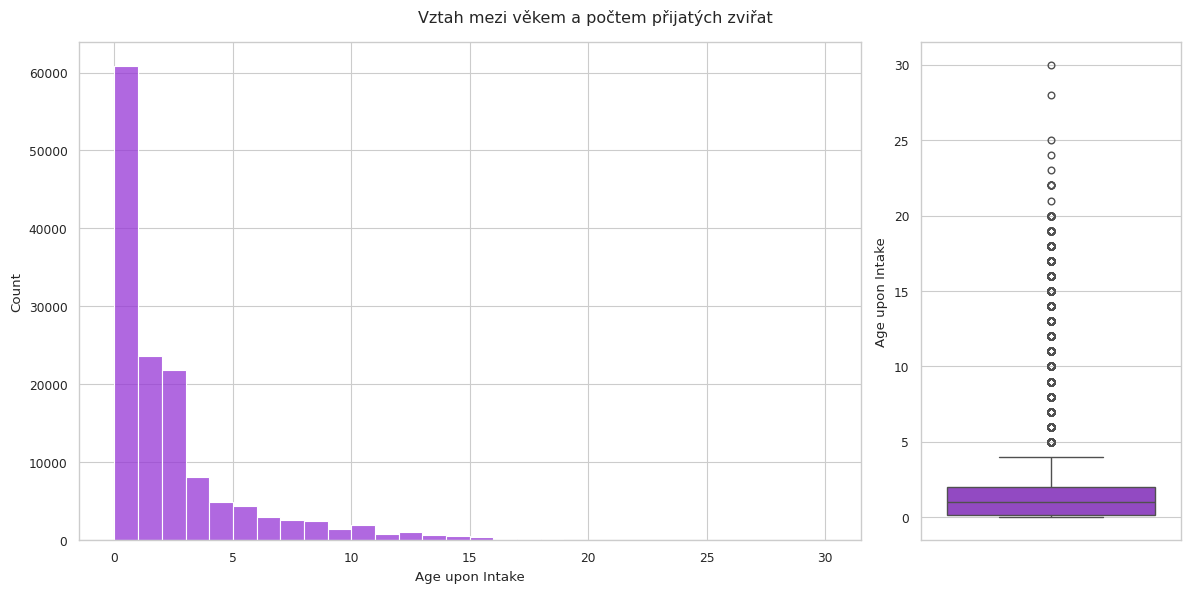

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={"width_ratios": [3, 1]})
sns.histplot(intakes["Age upon Intake"], bins=30, ax=ax1)
sns.boxplot(y=intakes["Age upon Intake"], ax=ax2)

fig.suptitle("Vztah mezi věkem a počtem přijatých zviřat")

plt.tight_layout()

> ##### Tady vidíme, že většina přijatých zvířat je menšího věku, což podtvrzuje předchozí pozorovaní, ale taky máme dost outliers

#### Prozkoumáme přiznak ***DateTime***

In [19]:
intakes["DateTime"].describe()

count                           138565
mean     2017-09-03 04:33:46.595749120
min                2013-10-01 07:51:00
25%                2015-08-12 18:29:00
50%                2017-07-20 16:44:00
75%                2019-07-08 11:25:00
max                2022-04-27 07:54:00
Name: DateTime, dtype: object

> ##### Vidíme, že máme záznamy od roku 2013 do roku 2022.

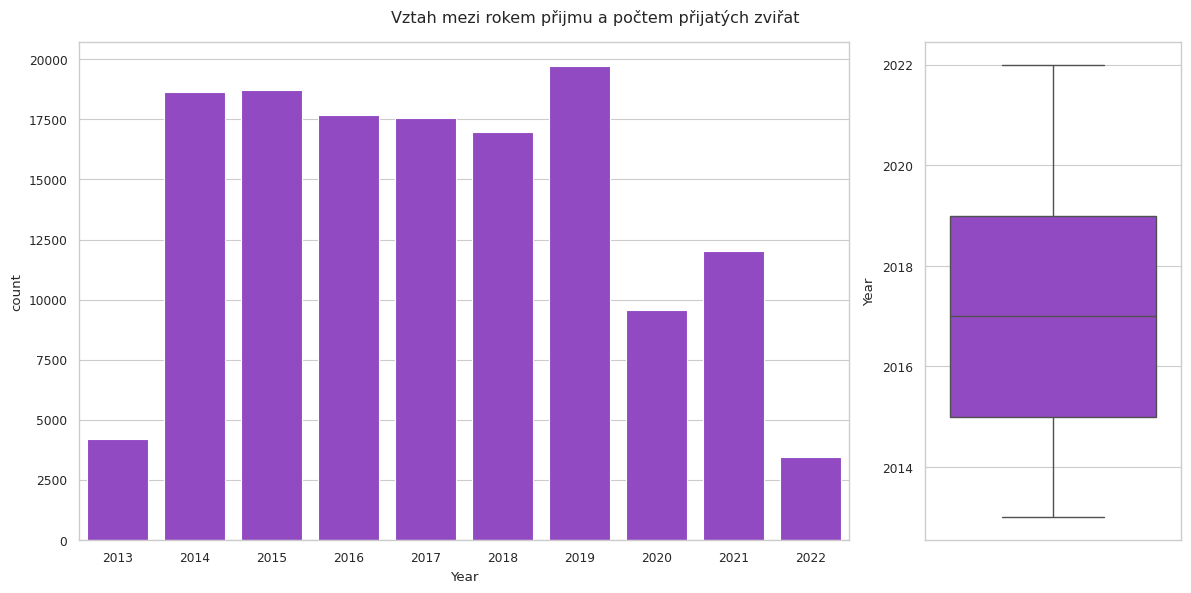

In [20]:
intakes["Year"] = intakes["DateTime"].dt.year  # vezmeme pouze rok prijmu

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={"width_ratios": [3, 1]})
sns.countplot(data=intakes, x="Year", ax=ax1)
sns.boxplot(y=intakes["Year"], ax=ax2)

fig.suptitle("Vztah mezi rokem přijmu a počtem přijatých zviřat")

plt.tight_layout()

> ##### Tady vidíme, že mezi lety 2014 a 2019 byl počet přijatých zvířat za rok stabilně vysoký, a poté se zmenšil téměř o polovinu

#### Prozkoumáme přiznak ***Animal Type***

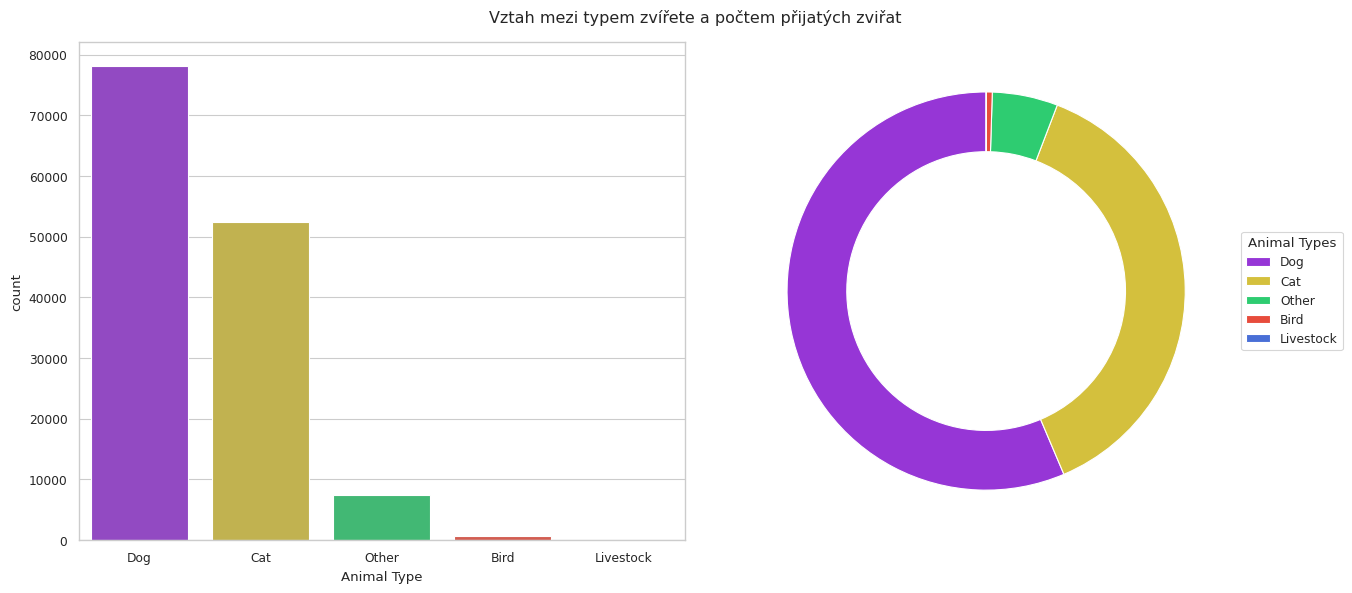

In [21]:
animal_type = intakes["Animal Type"].value_counts() # series s hodnotou a poctem zaznamu
sorted_order = animal_type.index # stejne ale s indeksaci

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={"width_ratios": [1, 1]})

current_palette = sns.color_palette(my_palette, len(sorted_order)) #nastavim paletu podle me palety
sorted_palette = {k: current_palette[i] for i, k in enumerate(sorted_order)} # nastavime presny soulad mezi barvami v palete a serazeným poradim

sns.countplot(data=intakes, x="Animal Type", hue="Animal Type", palette=sorted_palette, order=sorted_order, ax=ax1, legend=False)

wedges, texts = ax2.pie(animal_type, startangle=90, wedgeprops=dict(width=0.3), colors=[sorted_palette[k] for k in sorted_order])

ax2.legend(wedges, sorted_order, # legenda pro pie
          title="Animal Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

fig.suptitle("Vztah mezi typem zvířete a počtem přijatých zviřat")
plt.tight_layout()

> ##### Zde je vidět, že většinu zvířat v útulku tvoří psi, na druhém místě jsou kočky a ostatních druhů zvířat je mnohem méně.

#### Prozkoumáme přiznak ***Intake Type***

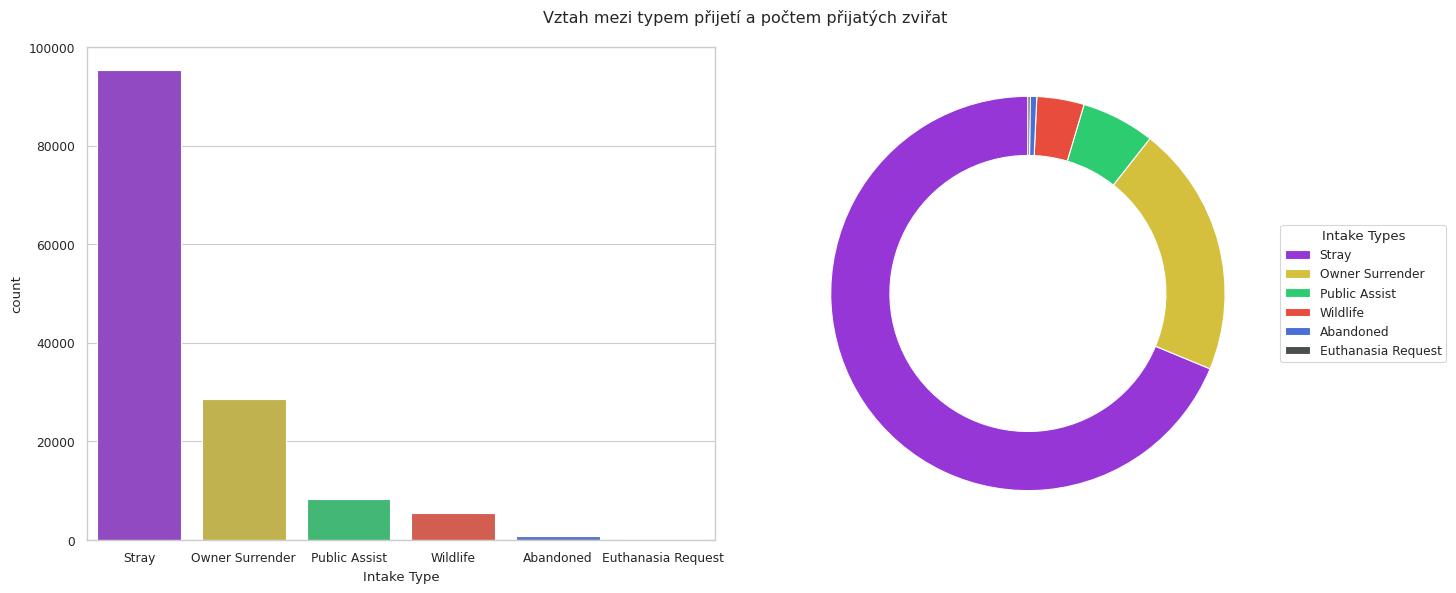

In [22]:
intake_type = intakes["Intake Type"].value_counts() # series s hodnotou a poctem zaznamu
sorted_order = intake_type.index # stejne ale s indeksaci

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={"width_ratios": [1, 1]})

current_palette = sns.color_palette(my_palette, len(sorted_order)) #nastavim paletu podle me palety
sorted_palette = {k: current_palette[i] for i, k in enumerate(sorted_order)} # nastavime presny soulad mezi barvami v palete a serazeným poradim

sns.countplot(data=intakes, x="Intake Type", hue="Intake Type", palette=sorted_palette, order=sorted_order, ax=ax1, legend=False)

wedges, texts = ax2.pie(intake_type, startangle=90, wedgeprops=dict(width=0.3), colors=[sorted_palette[k] for k in sorted_order])

ax2.legend(wedges, sorted_order, # legenda pro pie
          title="Intake Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

fig.suptitle("Vztah mezi typem přijetí a počtem přijatých zviřat")
plt.tight_layout()

> ##### Tento graf ukazuje, že absolutní většinu tvoří zvířata s typem přijetí *Stray*, na druhém místě jsou zvířata s typem přijetí *Owner Surrender* a ostatní hodnoty tvoří mnohem menší podíl

#### Prozkoumáme přiznak ***Sex upon Intake***

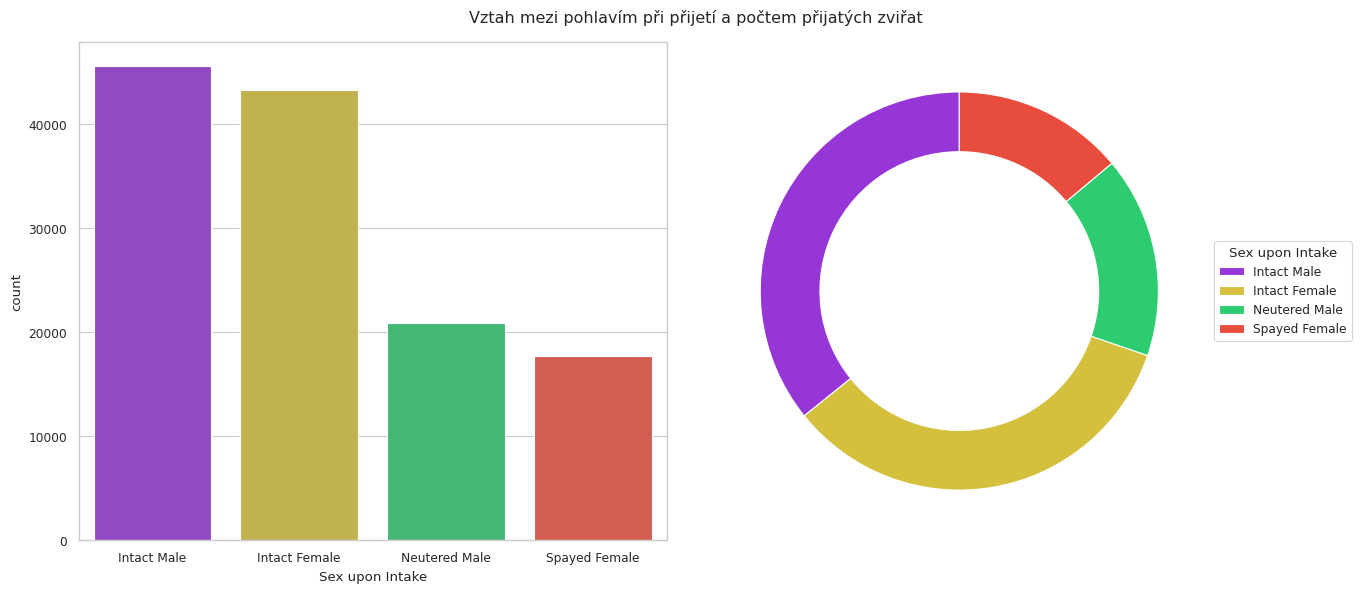

In [23]:
sex_upon_intake = intakes["Sex upon Intake"].value_counts() # series s hodnotou a poctem zaznamu
sorted_order = sex_upon_intake.index # stejne ale s indeksaci

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={"width_ratios": [1, 1]})

current_palette = sns.color_palette(my_palette, len(sorted_order)) #nastavim paletu podle me palety
sorted_palette = {k: current_palette[i] for i, k in enumerate(sorted_order)} # nastavime presny soulad mezi barvami v palete a serazeným poradim

sns.countplot(data=intakes, x="Sex upon Intake", hue="Sex upon Intake", palette=sorted_palette, order=sorted_order, ax=ax1, legend=False)

wedges, texts = ax2.pie(sex_upon_intake, startangle=90, wedgeprops=dict(width=0.3), colors=[sorted_palette[k] for k in sorted_order])

ax2.legend(wedges, sorted_order, # legenda pro pie
          title="Sex upon Intake",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

fig.suptitle("Vztah mezi pohlavím při přijetí a počtem přijatých zviřat")
plt.tight_layout()

> ##### Z grafu je vidět, že počet kastrovaných zvířat je přibližně dvakrát menší než počet nekastrovaných. Zároveň je počet samců a samic v každé skupině přibližně stejný

#### Prozkoumáme vztah mezi ***Intake Condition*** a ***Outcome Type*** (mezi kterými je velmi pravděpodobně nějaká korelace)

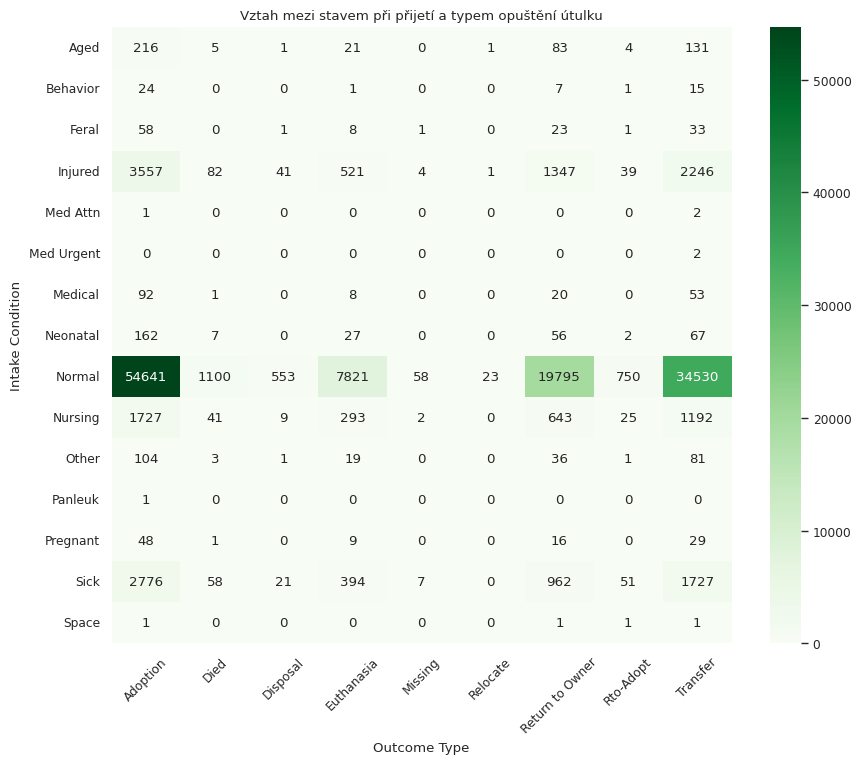

In [24]:
crosstab = pd.crosstab(intakes["Intake Condition"], outcomes["Outcome Type"])

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(crosstab, ax=ax, annot=True, cmap="Greens", fmt="g")

ax.set_title("Vztah mezi stavem při přijetí a typem opuštění útulku")
ax.set_ylabel("Intake Condition")
ax.set_xlabel("Outcome Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

> ##### Jak vidíme, dvojice *"Normal - Adoption"* výrazně převažuje nad všemi ostatními, což ukazuje, že lidé si z útulku častěji berou zvířata, která byla původně normální a neodlišovala se žádnými zvláštnostmi. Na druhou stranu tato silná převaha může zastínit jiné zajímavé korelace, které se nevyskytují tak často. Pro vyřešení tohoto problému navrhuji vzít logaritmus všech hodnot v tabulce a odstranit hodnotu "Normal", čímž se data v tabulce rozloží rovnoměrněji, což zvýší čitelnost grafu a pomůže při interpretaci dat

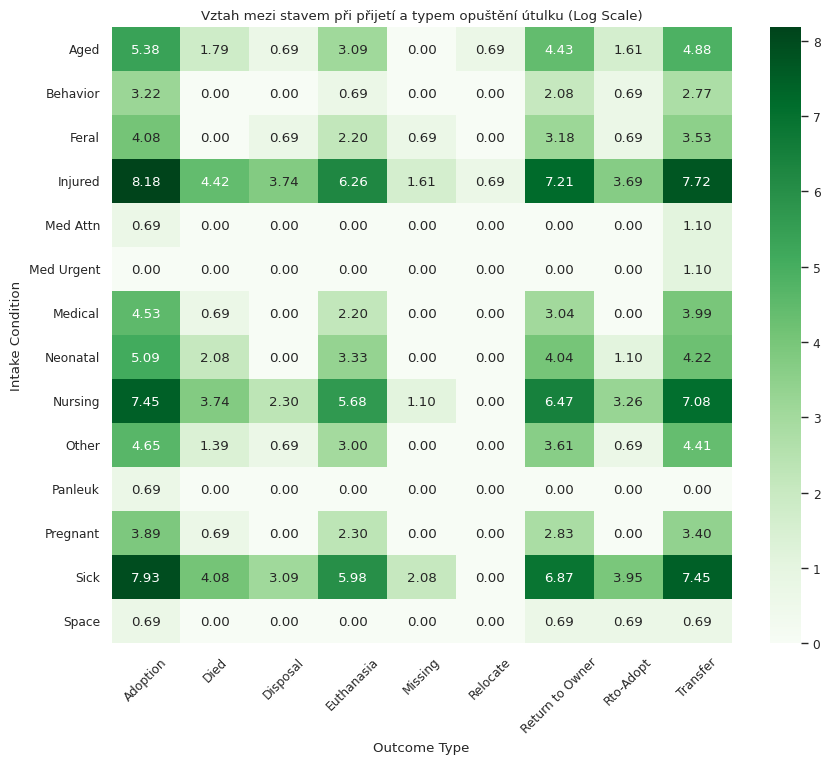

In [25]:
filtered_crosstab = crosstab.drop(index=["Normal"])

log_crosstab = np.log(filtered_crosstab + 1) # delame +1 protoze nechceme log od nuly :)

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(log_crosstab, ax=ax, annot=True, cmap="Greens", fmt=".2f")

ax.set_title("Vztah mezi stavem při přijetí a typem opuštění útulku (Log Scale)")
ax.set_ylabel("Intake Condition")
ax.set_xlabel("Outcome Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

> ##### Nyní můžeme z tohoto grafu zjistit více. Podle grafu můžeme usoudit, že zvířata, která jsou adoptována z útulku (*Adoption*) a vrácena majiteli (*Return to Owner*), jsou častěji ta, která měla při adopci stavy *Sick*, *Injured* a *Nursing*, což zní logicky, protože byla pravděpodobně vyléčena a stala se z nich normální zdravá zvířata. U zvířat, která měla při přijetí stejné stavy, se také výrazně liší typ odchodu z útulku *Transfer*, což pravděpodobně znamená, že tato zvířata musela být převezena na jiné místo, kde jim byla věnována speciální péče. Také u těchto stavů při přijetí se liší typ opuštění útulku *Euthanasie*, což pravděpodobně znamená, že některá zvířata se nakonec nepodařilo vyléčit :(

## *❓ Zadané otázky*

#### Závisí typ odchodu zvířete z útulku (***Outcome Type***) na typu příchodu (***Intake Type***)?

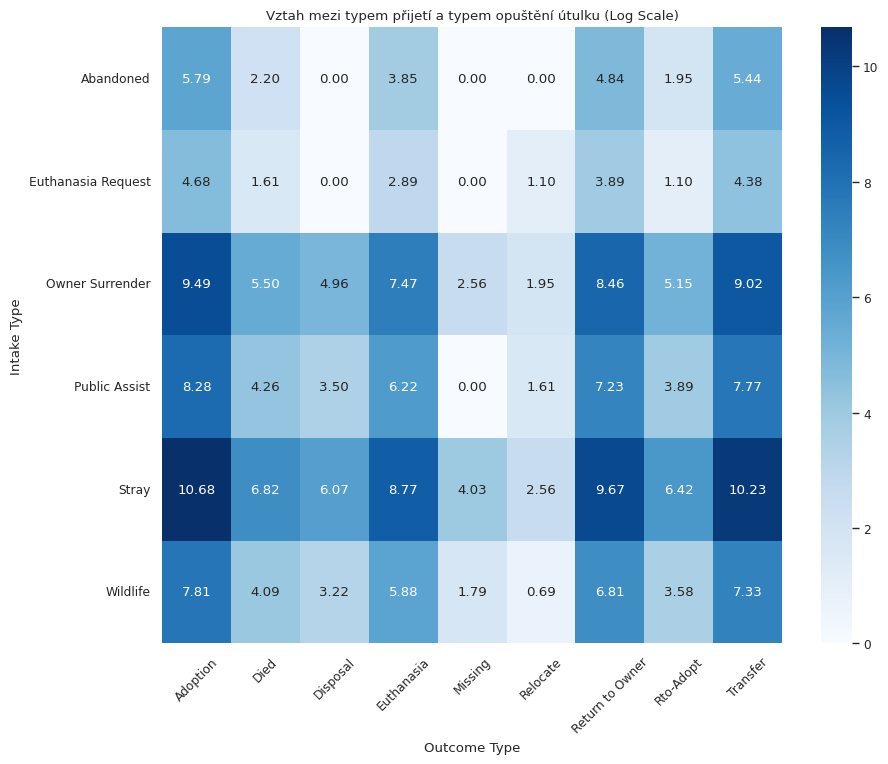

In [26]:
crosstab = pd.crosstab(intakes["Intake Type"], outcomes["Outcome Type"])
log_crosstab = np.log(crosstab + 1) # delame +1 protoze nechceme log od nuly :)

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(log_crosstab, ax=ax, annot=True, cmap="Blues", fmt=".2f")

ax.set_title("Vztah mezi typem přijetí a typem opuštění útulku (Log Scale)")
ax.set_ylabel("Intake Type")
ax.set_xlabel("Outcome Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

>Podle této heatmapy můžeme říct, že typ odchodu z útulku závisí na typu příchodu do útulku.
>Tak například:
> - Většina zvířat s typem přijetí *Stray* a *Owner Surrender* je následně adoptována, naopak typ přijetí *Euthanasia Request* se nejméně vyznačuje adopcí.
> - Pro typ opuštění útulku "Return to Owner" je nejméně charakteristický typ příchodu *Euthanasia Request*.



#### Hraje věk zvířete roli při adopci?

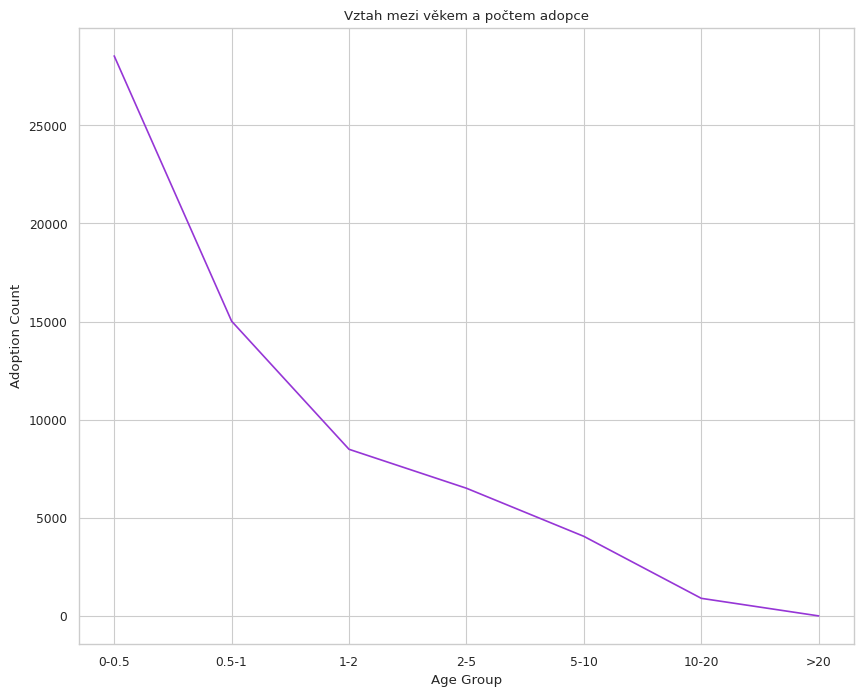

In [27]:
bins = [0, 0.5, 1, 2, 5, 10, 20, np.inf] # rozdelime vek na skupiny
labels = ["0-0.5", "0.5-1", "1-2", "2-5", "5-10", "10-20", ">20"]
outcomes["Age Group"] = pd.cut(outcomes["Age upon Outcome"], bins=bins, labels=labels)

aggregated_data = outcomes[outcomes["Outcome Type"] == "Adoption"].groupby("Age Group", observed=False).size().reset_index(name="Adoption Count")

fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=aggregated_data, x="Age Group", y="Adoption Count");
ax.set_title("Vztah mezi věkem a počtem adopce");

> ##### Z tohoto grafu je vidět, že věk zvířete má vliv na následnou adopci, konkrétně čím jsou starší zvířata, tím méně se jich adoptuje

#### Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

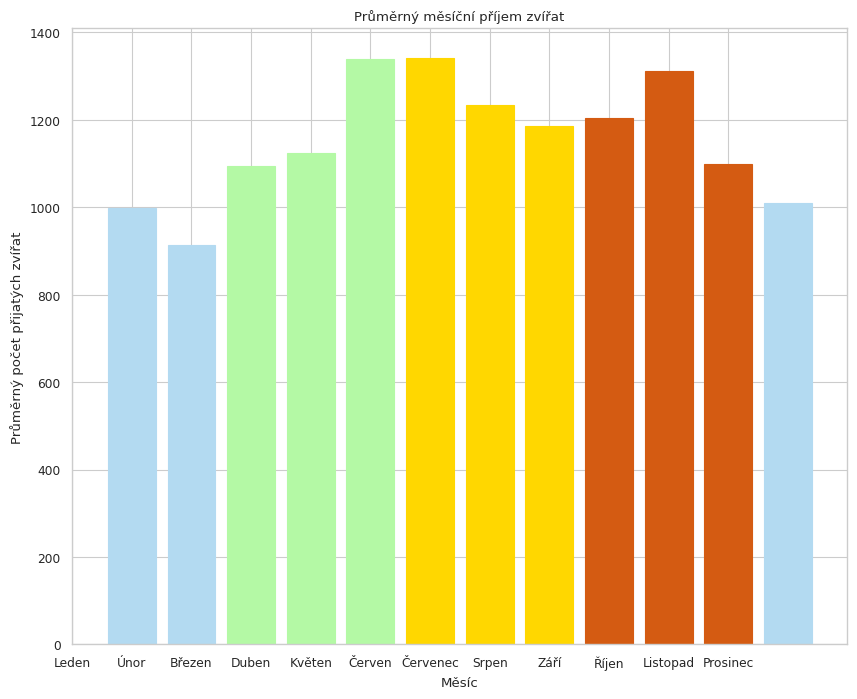

In [28]:
season_colors = { # definujeme barvy pro ruzne sezony
    "Zima": "#B3DAF1",  # Leden, Únor, Prosinec
    "Jaro": "#B4F9A5",  # Březen, Duben, Květen
    "Léto": "#FFD700",    # Červen, Červenec, Srpen
    "Podzim": "#D45B12"}  # Září, Říjen, Listopad

intakes["Month"] = intakes["DateTime"].dt.month # vytvorime sloupec s mesicem
monthly_counts = intakes.groupby("Month").size().reset_index(name="Average Count") # spocitame kolik prijmu mame za kazdy mesic celkem
monthly_counts["Average Count"] = monthly_counts["Average Count"] / len(intakes["DateTime"].dt.year.unique()) # spocitame stredni hodnotu pro kazdy mesic

monthly_counts["Color"] = monthly_counts["Month"].map({ # prirazujeme barvy mesicim
    1: season_colors["Zima"],
    2: season_colors["Zima"],
    3: season_colors["Jaro"],
    4: season_colors["Jaro"],
    5: season_colors["Jaro"],
    6: season_colors["Léto"],
    7: season_colors["Léto"],
    8: season_colors["Léto"],
    9: season_colors["Podzim"],
    10: season_colors["Podzim"],
    11: season_colors["Podzim"],
    12: season_colors["Zima"] })

fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.bar(monthly_counts["Month"], monthly_counts["Average Count"])

for bar, color in zip(bars, monthly_counts["Color"]): # nastavime barvy
    bar.set_color(color)

ax.set_title("Průměrný měsíční příjem zvířat")
ax.set_ylabel("Průměrný počet přijatých zvířat")
ax.set_xlabel("Měsíc")
ax.set_xticks(range(12))
ax.set_xticklabels(["Leden", "Únor", "Březen", "Duben", "Květen", "Červen", 
                    "Červenec", "Srpen", "Září", "Říjen", "Listopad", "Prosinec"]);

> #####  Podle tohoto grafu lze říci, že příjem zvířat je v průběhu roku nerovnoměrný, přičemž nejvytíženějšími měsíci jsou květen a červen a nejméně vytíženými měsíci jsou zimní měsíce.

## *❓ Vlastní otázky*

> ##### Načtěme dataset locations

In [29]:
locations = pd.read_csv("locations.csv")

> ##### Podiváme se jak vypadá

In [30]:
locations.head()

,Animal ID,Found Location,At AAC,Intake Date,Type,Looks Like,Color,Sex,Age,Image Link
0,A855691,"811 BURNSALL GATES DR78660\n(30.417121, -97.64...",Yes (come to the shelter),04/22/2022,Dog,Pit Bull Mix,Gray/White,Intact Male,2 years,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...
1,A855620,8203 COLONY LOOP DRIVE\nAUSTIN 78724\n(30.2971...,Yes (come to the shelter),04/20/2022,Dog,Cairn Terrier Mix,Tan,Intact Male,3 months,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...
2,A855431,1016 SOUTH MEADOWS DR\nAUSTIN 78758\n(30.37603...,No (contact for more info),04/18/2022,Cat,Domestic Shorthair,Black/White,Intact Male,4 weeks,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...
3,A855432,1016 SOUTH MEADOWS DR\nAUSTIN 78758\n(30.37603...,No (contact for more info),04/18/2022,Cat,Domestic Shorthair,Black/White,Intact Female,4 weeks,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...
4,A855461,"AUSTIN COLONY BLVD AUSTIN 78725\n(30.242394, -...",No (contact for more info),04/18/2022,Cat,Siamese,Flame Point,Intact Female,6 weeks,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...


> ##### Podívejme se na velikost dataframu a typ hodnot
> * A uvidíme, že všechny přiznaky zase májí type object

In [31]:
print(f"Dataframe 'intakes' má {locations.shape[0]} řádků a {locations.shape[1]} sloupců")
locations.dtypes.value_counts()

Dataframe 'intakes' má 102 řádků a 10 sloupců


object    10
Name: count, dtype: int64

> ##### Podívejme se na informace o dataframu
>> * Vidíme, že žadný přiznak nemá null hodnot

In [32]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Animal ID       102 non-null    object
 1   Found Location  102 non-null    object
 2   At AAC          102 non-null    object
 3   Intake Date     102 non-null    object
 4   Type            102 non-null    object
 5   Looks Like      102 non-null    object
 6   Color           102 non-null    object
 7   Sex             102 non-null    object
 8   Age             102 non-null    object
 9   Image Link      102 non-null    object
dtypes: object(10)
memory usage: 8.1+ KB


> ##### Zkontrolujeme všechny přiznaky na prázdné hodnoty

In [33]:
words = ["Unknown", "N/A", "None", "-", "?", ""] # co tam asi muze byt
word_stats_locations = {}

for col in locations.columns:
    count = 0
    for word in words:
        count += (locations[col] == word).sum()
    word_stats_locations[col] = count

for col, count in word_stats_locations.items():
    print(f"Přiznak {col}: {count} prázdných hodnot")

Přiznak Animal ID: 0 prázdných hodnot
Přiznak Found Location: 0 prázdných hodnot
Přiznak At AAC: 0 prázdných hodnot
Přiznak Intake Date: 0 prázdných hodnot
Přiznak Type: 0 prázdných hodnot
Přiznak Looks Like: 0 prázdných hodnot
Přiznak Color: 0 prázdných hodnot
Přiznak Sex: 11 prázdných hodnot
Přiznak Age: 0 prázdných hodnot
Přiznak Image Link: 0 prázdných hodnot


> ##### Vyměním prázdné hodnoty za NaN

In [34]:
locations = locations.replace(["Unknown", "N/A", "None", "-", "?", ""], np.nan)

> ##### Odstraním dublicitní zaznamy

In [35]:
locations = locations.drop_duplicates()

> ##### Upravím obsah hodnot tak, aby přiznak At AAC obsahoval pouze hodnoty "Ano" a "Ne", protože zbytek pro nás není důležitý

In [36]:
def edit_AAC(value):
    if "Yes" in value: return "Yes"
    else: return "No"

locations["At AAC"] = locations["At AAC"].apply(edit_AAC)

> ##### Zkonvertuju kategorické příznaky na typ category

In [37]:
to_category_locations = ["At AAC", "Type", "Looks Like", "Color", "Sex"]
for col in to_category_locations:
    locations[col] = locations[col].astype("category")

> ##### Převedu přiznak ***Age*** na počítání v rocích (ve floatu)

In [38]:
locations["Age"] = locations["Age"].apply(age_to_years)

> ##### Nastavím správný typ pro datum

In [39]:
locations["Intake Date"] = pd.to_datetime(locations["Intake Date"], format = "%m/%d/%Y") # format podle 04/22/2022

> ##### Přiznak ***Image Link*** je zbytečný, proto ho dropnu

In [40]:
locations.drop("Image Link", axis=1, inplace=True)

#### Popište vztah mezi typem a věkem zvířete v utulku

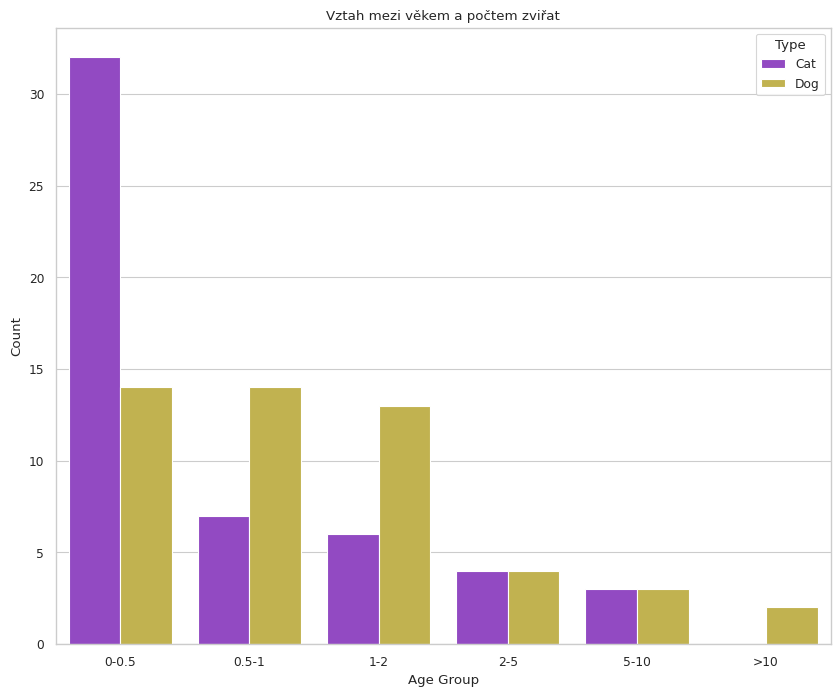

In [41]:
bins = [0, 0.5, 1, 2, 5, 10, np.inf] # rozdelime vek na skupiny
labels = ["0-0.5", "0.5-1", "1-2", "2-5", "5-10", ">10"]
locations["Age Group"] = pd.cut(locations["Age"], bins=bins, labels=labels)

aggregated_data = locations.groupby(["Age Group", "Type"], observed=False).size().reset_index(name="Count")

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=aggregated_data, x="Age Group", y="Count", hue="Type");
ax.set_title("Vztah mezi věkem a počtem zviřat");

> ##### Z tohoto grafu je vidět, že ve věku do 0,5 roku je počet psů přibližně dvakrát vyšší než počet koček. Poté pro věk od 0,5 do 2 let statistika se mění a počet koček se stává také dvakrát větším než počet psů. U zvířat starších 2 let se počet vyrovnává

#### Porovnejte počet zvířat v útulku a u dobrovolníků

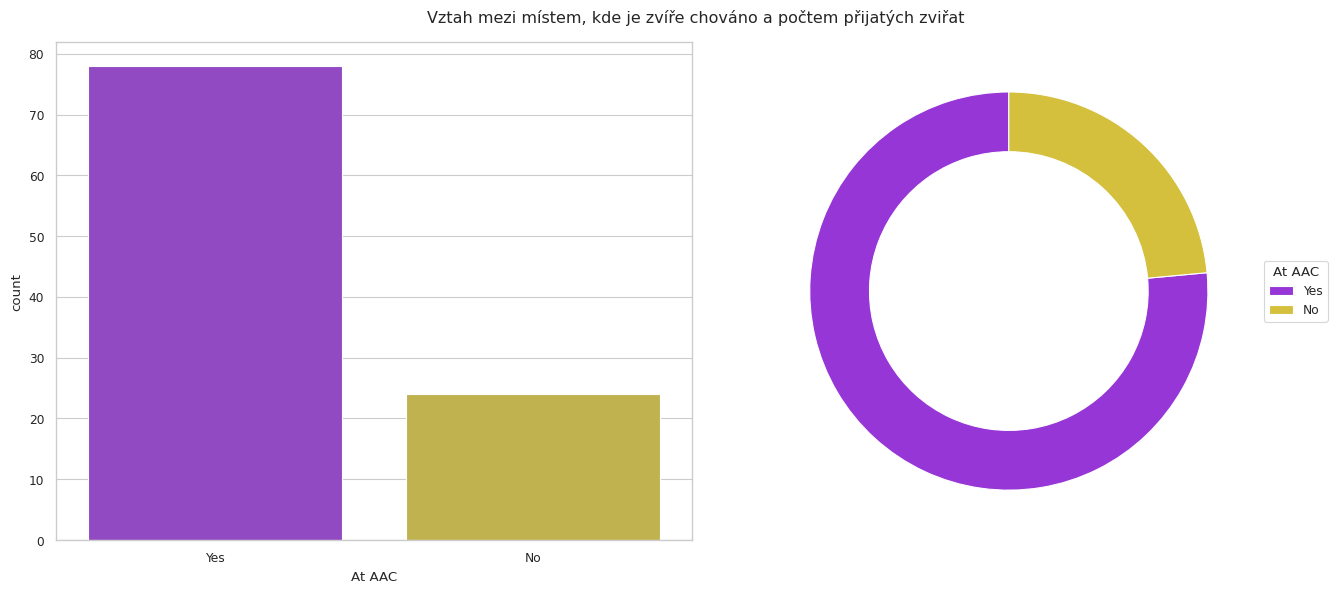

In [42]:
aac = locations["At AAC"].value_counts() # series s hodnotou a poctem zaznamu
sorted_order = aac.index # stejne ale s indeksaci

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={"width_ratios": [1, 1]})

current_palette = sns.color_palette(my_palette, len(sorted_order)) #nastavim paletu podle me palety
sorted_palette = {k: current_palette[i] for i, k in enumerate(sorted_order)} # nastavime presny soulad mezi barvami v palete a serazeným poradim

sns.countplot(data=locations, x="At AAC", hue="At AAC", palette=sorted_palette, order=sorted_order, ax=ax1, legend=False)

wedges, texts = ax2.pie(aac, startangle=90, wedgeprops=dict(width=0.3), colors=[sorted_palette[k] for k in sorted_order])

ax2.legend(wedges, sorted_order, # legenda pro pie
          title="At AAC",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

fig.suptitle("Vztah mezi místem, kde je zvíře chováno a počtem přijatých zviřat")
plt.tight_layout()

> ##### Tento graf ukazuje, že přibližně tři čtvrtiny všech zvířat jsou v útulku a zbývající čtvrtina je u dobrovolníků

#### Porovnejte typ zvířat v útulku a u dobrovolníků.

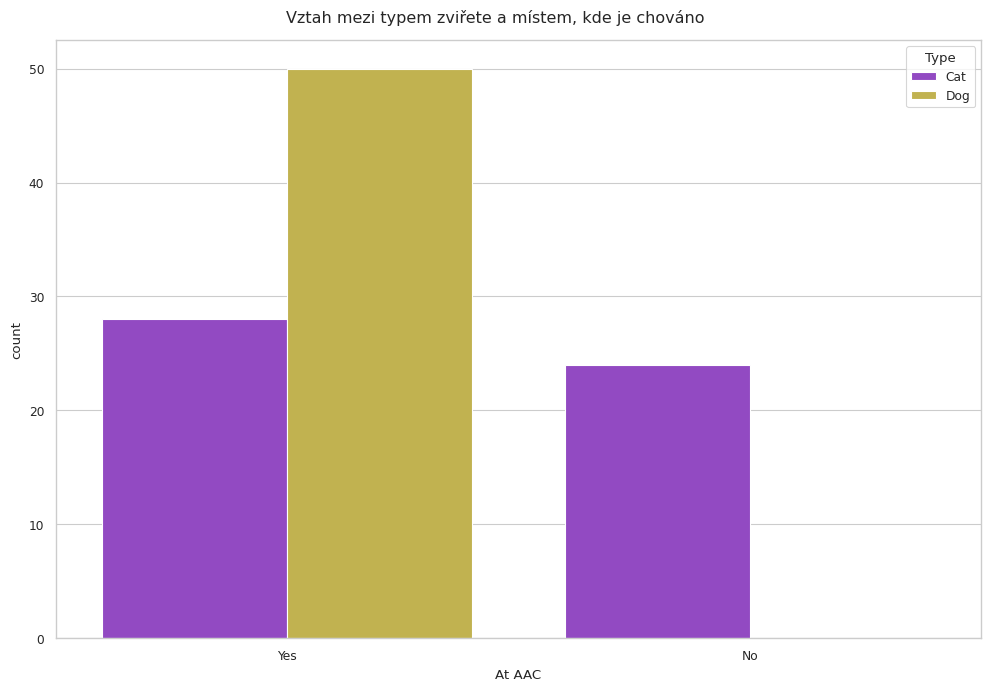

In [43]:
aac = locations["At AAC"].value_counts() # series s hodnotou a poctem zaznamu
sorted_order = aac.index # stejne ale s indeksaci

fig, ax = plt.subplots(figsize=(10, 7))

sns.countplot(data=locations, x="At AAC", hue="Type", order=sorted_order, ax=ax)

fig.suptitle("Vztah mezi typem zviřete a místem, kde je chováno")
plt.tight_layout()

> ##### Z tohoto grafu je vidět, že počet koček v útulku i u dobrovolníků je přibližně stejný. Vidíme také, že dobrovolníci nemají žádné psy.

### Konec :)